#Sentiment Analysis of Crypto News

In [ ]:
#imort essential modules
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
# Github reference Link for pygooglenews module: https://github.com/kotartemiy/pygooglenews

!pip install pygooglenews

In [ ]:
#Get news articles from Google News

#import Google News module
from pygooglenews import GoogleNews

gn = GoogleNews()

In [ ]:
#Top Stories
top = gn.top_news()

#Getting Stories by Topic
# search for the best matching articles that mention cryptocurrency
search = gn.search('Cryptocurrency')

In [ ]:
search

{'entries': [{'guidislink': False,
   'id': 'CBMiVWh0dHBzOi8vZmluYW5jZS55YWhvby5jb20vbmV3cy9qcG1vcmdhbi1zYXlzLWNyeXB0b2N1cnJlbmN5LWJldHRlci1idXktMjIzMDAwMzEwLmh0bWzSAV1odHRwczovL2ZpbmFuY2UueWFob28uY29tL2FtcGh0bWwvbmV3cy9qcG1vcmdhbi1zYXlzLWNyeXB0b2N1cnJlbmN5LWJldHRlci1idXktMjIzMDAwMzEwLmh0bWw',
   'link': 'https://finance.yahoo.com/news/jpmorgan-says-cryptocurrency-better-buy-223000310.html',
   'links': [{'href': 'https://finance.yahoo.com/news/jpmorgan-says-cryptocurrency-better-buy-223000310.html',
     'rel': 'alternate',
     'type': 'text/html'}],
   'published': 'Tue, 23 Nov 2021 22:30:00 GMT',
   'published_parsed': time.struct_time(tm_year=2021, tm_mon=11, tm_mday=23, tm_hour=22, tm_min=30, tm_sec=0, tm_wday=1, tm_yday=327, tm_isdst=0),
   'source': {'href': 'https://finance.yahoo.com', 'title': 'Yahoo Finance'},
   'sub_articles': [],
   'summary': '<a href="https://finance.yahoo.com/news/jpmorgan-says-cryptocurrency-better-buy-223000310.html" target="_blank">JPMorgan says thi

In [ ]:
#Method 2
!pip install requests
!pip install requests_html
from requests_html import HTMLSession

In [ ]:
url = 'https://news.google.com/rss/search?q=cryptocurrency&hl=en-US&gl=US&ceid=US%3Aen'

In [ ]:
s = HTMLSession()
r = s.get(url)
print(r.html.html)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><rss version="2.0" xmlns:media="http://search.yahoo.com/mrss/"><channel><generator>NFE/5.0</generator><title>"cryptocurrency" - Google News</title><link>https://news.google.com/search?q=cryptocurrency&amp;hl=en-US&amp;gl=US&amp;ceid=US:en</link><language>en-US</language><webMaster>news-webmaster@google.com</webMaster><copyright>2021 Google Inc.</copyright><lastBuildDate>Wed, 24 Nov 2021 05:43:50 GMT</lastBuildDate><description>Google News</description><item><title>JPMorgan says this cryptocurrency is a better buy than Bitcoin as interest rates rise — here are 3 easy ways to invest - Yahoo Finance</title><link>https://finance.yahoo.com/news/jpmorgan-says-cryptocurrency-better-buy-223000310.html</link><guid isPermaLink="false">CBMiVWh0dHBzOi8vZmluYW5jZS55YWhvby5jb20vbmV3cy9qcG1vcmdhbi1zYXlzLWNyeXB0b2N1cnJlbmN5LWJldHRlci1idXktMjIzMDAwMzEwLmh0bWzSAV1odHRwczovL2ZpbmFuY2UueWFob28uY29tL2FtcGh0bWwvbmV3cy9qcG1vcmdhbi1zYXlzLWNyeXB0b2N1cnJlbm

In [ ]:
for title in r.html.find("title"):
  print(title.text)

"cryptocurrency" - Google News
JPMorgan says this cryptocurrency is a better buy than Bitcoin as interest rates rise — here are 3 easy ways to invest - Yahoo Finance
Cryptocurrency crash: Bitcoin, Ethereum fall in value. Here are possible causes - Hindustan Times
Bitcoin, Shiba Inu plunge while dogecoin, ether gain. Check cryptocurrency prices today - Livemint
What if India bans circulation of cryptocurrency? What Zerodha founder says - Livemint
'Govt lists ‘The cryptocurrency and Regulation of the Official Digital Currency Bill 2021' for Winter session - Economic Times
What Is Cryptocurrency? - MONEY
Avalanche Defies Market Crash To Replace Dogecoin As Top 10 Cryptocurrency - Forbes
Congress must clarify how the infrastructure bill will impact cryptocurrency - TechCrunch
Coinbase CFO's outlook on the future of cryptocurrency - CNBC
Environmentalists sound alarm at US politicians’ embrace of cryptocurrency - The Guardian
Cryptocurrency investments are rising, but so are scams - WEAU
Th

In [ ]:
print(search.keys())

dict_keys(['feed', 'entries'])


In [ ]:
print(search['feed'])

{'generator_detail': {'name': 'NFE/5.0'}, 'generator': 'NFE/5.0', 'title': '"Cryptocurrency" - Google News', 'title_detail': {'type': 'text/plain', 'language': None, 'base': '', 'value': '"Cryptocurrency" - Google News'}, 'links': [{'rel': 'alternate', 'type': 'text/html', 'href': 'https://news.google.com/search?q=Cryptocurrency&ceid=US:en&hl=en-US&gl=US'}], 'link': 'https://news.google.com/search?q=Cryptocurrency&ceid=US:en&hl=en-US&gl=US', 'language': 'en-US', 'publisher': 'news-webmaster@google.com', 'publisher_detail': {'email': 'news-webmaster@google.com'}, 'rights': '2021 Google Inc.', 'rights_detail': {'type': 'text/plain', 'language': None, 'base': '', 'value': '2021 Google Inc.'}, 'updated': 'Wed, 24 Nov 2021 05:43:44 GMT', 'updated_parsed': time.struct_time(tm_year=2021, tm_mon=11, tm_mday=24, tm_hour=5, tm_min=43, tm_sec=44, tm_wday=2, tm_yday=328, tm_isdst=0), 'subtitle': 'Google News', 'subtitle_detail': {'type': 'text/html', 'language': None, 'base': '', 'value': 'Google 

In [ ]:
print(search['entries'])

[{'title': 'JPMorgan says this cryptocurrency is a better buy than Bitcoin as interest rates rise — here are 3 easy ways to invest - Yahoo Finance', 'title_detail': {'type': 'text/plain', 'language': None, 'base': '', 'value': 'JPMorgan says this cryptocurrency is a better buy than Bitcoin as interest rates rise — here are 3 easy ways to invest - Yahoo Finance'}, 'links': [{'rel': 'alternate', 'type': 'text/html', 'href': 'https://finance.yahoo.com/news/jpmorgan-says-cryptocurrency-better-buy-223000310.html'}], 'link': 'https://finance.yahoo.com/news/jpmorgan-says-cryptocurrency-better-buy-223000310.html', 'id': 'CBMiVWh0dHBzOi8vZmluYW5jZS55YWhvby5jb20vbmV3cy9qcG1vcmdhbi1zYXlzLWNyeXB0b2N1cnJlbmN5LWJldHRlci1idXktMjIzMDAwMzEwLmh0bWzSAV1odHRwczovL2ZpbmFuY2UueWFob28uY29tL2FtcGh0bWwvbmV3cy9qcG1vcmdhbi1zYXlzLWNyeXB0b2N1cnJlbmN5LWJldHRlci1idXktMjIzMDAwMzEwLmh0bWw', 'guidislink': False, 'published': 'Tue, 23 Nov 2021 22:30:00 GMT', 'published_parsed': time.struct_time(tm_year=2021, tm_mon=11, 

In [ ]:
title = []
link = []
date = []
for item in search['entries']:
  title.append(item['title'])
  link.append(item['link'])
  date.append(item['published'])
  print(item['title'])
  print(item.link)
  print(item['published'])

JPMorgan says this cryptocurrency is a better buy than Bitcoin as interest rates rise — here are 3 easy ways to invest - Yahoo Finance
https://finance.yahoo.com/news/jpmorgan-says-cryptocurrency-better-buy-223000310.html
Tue, 23 Nov 2021 22:30:00 GMT
Cryptocurrency crash: Bitcoin, Ethereum fall in value. Here are possible causes - Hindustan Times
https://www.hindustantimes.com/business/cryptocurrency-crash-bitcoin-ethereum-fall-in-value-here-are-possible-causes-101637716874235.html
Wed, 24 Nov 2021 02:03:52 GMT
Bitcoin, Shiba Inu plunge while dogecoin, ether gain. Check cryptocurrency prices today - Livemint
https://www.livemint.com/market/cryptocurrency/cryptocurrency-prices-today-bitcoin-dogecoin-shiba-inu-solana-plunge-check-latest-rates-11637719219762.html
Wed, 24 Nov 2021 02:27:27 GMT
What if India bans circulation of cryptocurrency? What Zerodha founder says - Livemint
https://www.livemint.com/market/cryptocurrency/what-if-india-bans-circulation-of-cryptocurrency-what-zerodha-fou

In [ ]:
df = pd.DataFrame()

In [ ]:

df['title'] = pd.Series(title).values
df['link'] = pd.Series(link).values
df['date'] = pd.Series(date).values

df

,title,link,date
0,JPMorgan says this cryptocurrency is a better ...,https://finance.yahoo.com/news/jpmorgan-says-c...,"Tue, 23 Nov 2021 22:30:00 GMT"
1,"Cryptocurrency crash: Bitcoin, Ethereum fall i...",https://www.hindustantimes.com/business/crypto...,"Wed, 24 Nov 2021 02:03:52 GMT"
2,"Bitcoin, Shiba Inu plunge while dogecoin, ethe...",https://www.livemint.com/market/cryptocurrency...,"Wed, 24 Nov 2021 02:27:27 GMT"
3,What if India bans circulation of cryptocurren...,https://www.livemint.com/market/cryptocurrency...,"Wed, 24 Nov 2021 01:16:45 GMT"
4,'Govt lists ‘The cryptocurrency and Regulation...,https://economictimes.indiatimes.com/markets/c...,"Tue, 23 Nov 2021 14:58:00 GMT"
...,...,...,...
95,Jagran Explainer | A look at the Cryptocurrenc...,https://english.jagran.com/business/jagran-exp...,"Wed, 24 Nov 2021 05:23:11 GMT"
96,Next-generation Cryptocurrency Bitcoin Latinum...,https://finance.yahoo.com/news/next-generation...,"Tue, 26 Oct 2021 07:00:00 GMT"
97,Cryptocurrency Elrond Rises More Than 4% In 24...,https://www.benzinga.com/markets/cryptocurrenc...,"Tue, 23 Nov 2021 19:10:00 GMT"
98,"PayPal, Venmo and CashApp simplify cryptocurre...",https://www.cnet.com/personal-finance/crypto/p...,"Wed, 03 Nov 2021 07:00:00 GMT"


In [ ]:
#convert date column to proper date format

from dateutil.parser import parse

df['date'] = df['date'].apply(lambda x: parse(x).date())

#show data
df.head(3)  

,title,link,date
0,JPMorgan says this cryptocurrency is a better ...,https://finance.yahoo.com/news/jpmorgan-says-c...,2021-11-23
1,"Cryptocurrency crash: Bitcoin, Ethereum fall i...",https://www.hindustantimes.com/business/crypto...,2021-11-24
2,"Bitcoin, Shiba Inu plunge while dogecoin, ethe...",https://www.livemint.com/market/cryptocurrency...,2021-11-24


In [ ]:
#create function to get the polarity
#range from -1 to 1
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create new column called polarity
df['Polarity'] = df['title'].apply(getPolarity)

#show data
df.head(3)

,title,link,date,Polarity
0,JPMorgan says this cryptocurrency is a better ...,https://finance.yahoo.com/news/jpmorgan-says-c...,2021-11-23,0.466667
1,"Cryptocurrency crash: Bitcoin, Ethereum fall i...",https://www.hindustantimes.com/business/crypto...,2021-11-24,0.000000
2,"Bitcoin, Shiba Inu plunge while dogecoin, ethe...",https://www.livemint.com/market/cryptocurrency...,2021-11-24,0.000000


In [ ]:
# Create a function to compute negative, neutral and positive sentiments

def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

#Create a new column to score the sentiment 
df['sentiment'] = df['Polarity'].apply(getSentiment)


#Show data
df.head()

,title,link,date,Polarity,sentiment
0,JPMorgan says this cryptocurrency is a better ...,https://finance.yahoo.com/news/jpmorgan-says-c...,2021-11-23,0.466667,Positive
1,"Cryptocurrency crash: Bitcoin, Ethereum fall i...",https://www.hindustantimes.com/business/crypto...,2021-11-24,0.000000,Neutral
2,"Bitcoin, Shiba Inu plunge while dogecoin, ethe...",https://www.livemint.com/market/cryptocurrency...,2021-11-24,0.000000,Neutral
3,What if India bans circulation of cryptocurren...,https://www.livemint.com/market/cryptocurrency...,2021-11-24,0.000000,Neutral
4,'Govt lists ‘The cryptocurrency and Regulation...,https://economictimes.indiatimes.com/markets/c...,2021-11-23,0.100000,Positive


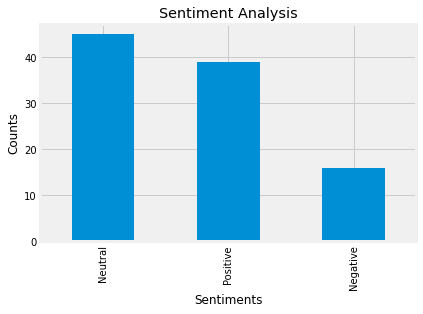

In [ ]:
#plot and visualize the sentiment count
plt.title('Sentiment Analysis')
df['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.show()

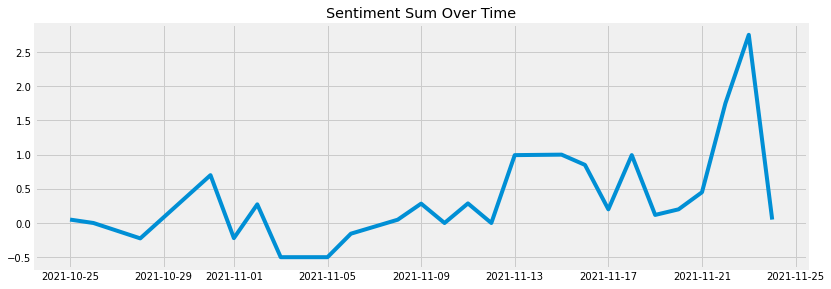

In [ ]:
#Plot the sum of the polarity for each date
plt.figure(figsize=(12.33,4.5))
plt.title('Sentiment Sum Over Time')
polarity = df.groupby(['date']).sum()['Polarity']
plt.plot(polarity.index,polarity)

In [ ]:
#show the sum of the polarity for each date
polarity

date
2021-10-25    0.050000
2021-10-26    0.000000
2021-10-28   -0.225000
2021-10-31    0.700000
2021-11-01   -0.221212
2021-11-02    0.272727
2021-11-03   -0.500000
2021-11-05   -0.500000
2021-11-06   -0.156250
2021-11-08    0.048182
2021-11-09    0.283333
2021-11-10    0.000000
2021-11-11    0.286364
2021-11-12    0.000000
2021-11-13    0.992857
2021-11-15    1.000000
2021-11-16    0.850000
2021-11-17    0.200000
2021-11-18    0.993182
2021-11-19    0.118182
2021-11-20    0.200000
2021-11-21    0.450000
2021-11-22    1.749621
2021-11-23    2.753030
2021-11-24    0.050000
Name: Polarity, dtype: float64

In [ ]:
# get the count articles per date
polarity_count = df.groupby(['date']).count()['Polarity']

#show data
polarity_count

date
2021-10-25     1
2021-10-26     1
2021-10-28     2
2021-10-31     2
2021-11-01     2
2021-11-02     2
2021-11-03     2
2021-11-05     1
2021-11-06     2
2021-11-08     3
2021-11-09     3
2021-11-10     4
2021-11-11     8
2021-11-12     1
2021-11-13     2
2021-11-15     2
2021-11-16     2
2021-11-17     3
2021-11-18     5
2021-11-19     2
2021-11-20     3
2021-11-21     4
2021-11-22    10
2021-11-23    25
2021-11-24     8
Name: Polarity, dtype: int64

In [ ]:
# Show the average sentiment for each day

polarity_average = polarity/polarity_count

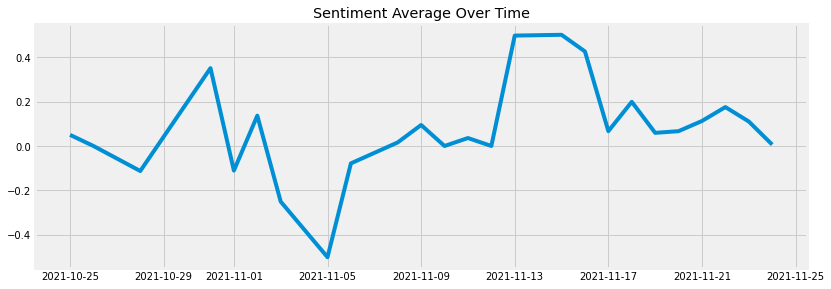

In [ ]:
#plot the average sentiment over time

plt.figure(figsize=(12.33,4.5))
plt.title('Sentiment Average Over Time')
plt.plot(polarity_average.index, polarity_average)